In [1]:
import numpy as np
from qiskit import *
%matplotlib inline

In [2]:
circ = QuantumCircuit(3)

In [3]:
circ.h(0)
circ.cx(0,1)
circ.cx(0,2)


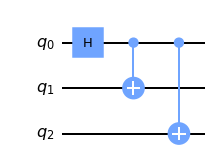

In [4]:
circ.draw('mpl')


In [5]:
from qiskit import Aer


In [6]:
backend = Aer.get_backend('statevector_simulator')

In [7]:
job= execute(circ,backend)

In [8]:
result = job.result()

In [9]:
outputstate = result.get_statevector(circ,decimals = 3)


In [10]:
print(outputstate)

[0.70710678+0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


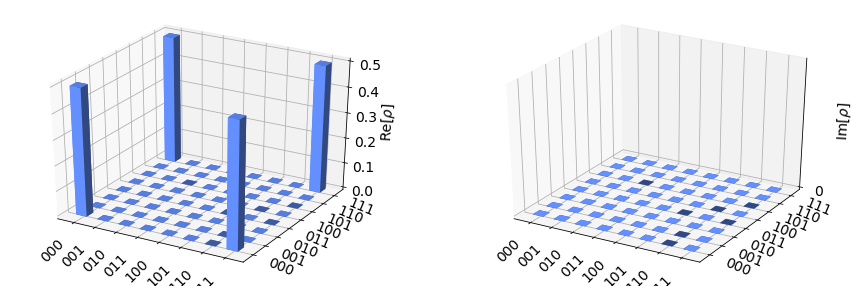

In [11]:
from qiskit.visualization import plot_state_city as plt
plt(outputstate)

In [13]:
backend = Aer.get_backend('unitary_simulator')
job = execute(circ,backend)
result = job.result()
print(result.get_unitary(circ, decimals = 3))

[[ 0.70710678+0.00000000e+00j  0.70710678-8.65956056e-17j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j]
 [ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.70710678+0.00000000e+00j -0.70710678+8.65956056e-17j]
 [ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.70710678+0.00000000e+00j  0.70710678-8.65956056e-17j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j]
 [ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.70710678+0.00000000e+00j -0.70710678+8.65956056e-17j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j]
 [ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.     

In [17]:
meas = QuantumCircuit(3,3)
meas.barrier(range(3))

meas.measure(range(3),range(3))

qc = circ + meas

qc.draw()

┌───┐           ░ ┌─┐      
q_0: ┤ H ├──■────■───░─┤M├──────
     └───┘┌─┴─┐  │   ░ └╥┘┌─┐   
q_1: ─────┤ X ├──┼───░──╫─┤M├───
          └───┘┌─┴─┐ ░  ║ └╥┘┌─┐
q_2: ──────────┤ X ├─░──╫──╫─┤M├
               └───┘ ░  ║  ║ └╥┘
c: 3/═══════════════════╩══╩══╩═
                        0  1  2

In [19]:
backend_sim = Aer.get_backend('qasm_simulator')

job_sim = execute(qc, backend_sim, shots = 1024)

result_sim = job_sim.result()

In [20]:
counts = result_sim.get_counts(qc)
print(counts)

{'000': 519, '111': 505}


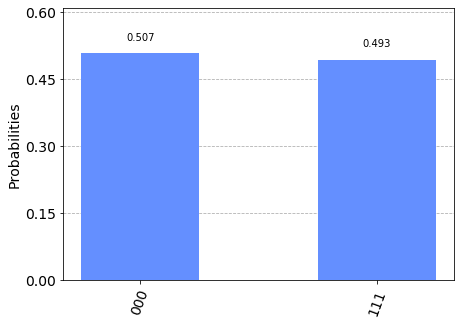

In [21]:
from qiskit.visualization import plot_histogram

plot_histogram(counts)